In [26]:
import pandas as pd
import numpy as np

In [27]:
sales = pd.read_csv("sales.csv", sep=";")
sales

,datetime,partner_id,sale_amount
0,2020-02-03 00:00:17 UTC,48113,277.06
1,2020-02-03 00:01:02 UTC,63233,277.06
2,2020-02-03 00:01:17 UTC,63233,277.06
3,2020-02-03 00:09:28 UTC,48113,277.06
4,2020-02-03 00:11:10 UTC,81713,277.06
...,...,...,...
38654,2020-03-15 23:51:18 UTC,105653,69.32
38655,2020-03-15 23:51:25 UTC,66220,277.06
38656,2020-03-15 23:52:25 UTC,63233,277.06
38657,2020-03-15 23:56:29 UTC,66220,277.06


In [28]:
sales["Date"] = pd.to_datetime(sales["datetime"]).dt.date
sales = sales[["Date", "partner_id", "sale_amount"]]

In [29]:
DATA = sales.groupby(['Date', 'partner_id']).sum().reset_index()
DATA

,Date,partner_id,sale_amount
0,2020-02-03,46760,1177.56
1,2020-02-03,46807,606.73
2,2020-02-03,47647,346.38
3,2020-02-03,47833,277.06
4,2020-02-03,48113,46724.85
...,...,...,...
3610,2020-03-15,144807,277.06
3611,2020-03-15,147793,277.06
3612,2020-03-15,152180,277.06
3613,2020-03-15,154793,393.02


In [30]:
DATA["rank"] = DATA.groupby(['Date'])["sale_amount"].rank("dense", ascending=False)
DATA

,Date,partner_id,sale_amount,rank
0,2020-02-03,46760,1177.56,20.0
1,2020-02-03,46807,606.73,33.0
2,2020-02-03,47647,346.38,41.0
3,2020-02-03,47833,277.06,43.0
4,2020-02-03,48113,46724.85,1.0
...,...,...,...,...
3610,2020-03-15,144807,277.06,51.0
3611,2020-03-15,147793,277.06,51.0
3612,2020-03-15,152180,277.06,51.0
3613,2020-03-15,154793,393.02,48.0


In [31]:
DATA['Top'] = np.where(DATA['rank'] > 5, 6, DATA['rank'])
DATA

,Date,partner_id,sale_amount,rank,Top
0,2020-02-03,46760,1177.56,20.0,6.0
1,2020-02-03,46807,606.73,33.0,6.0
2,2020-02-03,47647,346.38,41.0,6.0
3,2020-02-03,47833,277.06,43.0,6.0
4,2020-02-03,48113,46724.85,1.0,1.0
...,...,...,...,...,...
3610,2020-03-15,144807,277.06,51.0,6.0
3611,2020-03-15,147793,277.06,51.0,6.0
3612,2020-03-15,152180,277.06,51.0,6.0
3613,2020-03-15,154793,393.02,48.0,6.0


In [32]:
DATA['Top'] = 'Top ' + DATA['Top'].apply(str)
DATA['Top']  = DATA['Top'].str.replace('.0', '').str.replace('Top 6', 'Other')

In [33]:
DATA

,Date,partner_id,sale_amount,rank,Top
0,2020-02-03,46760,1177.56,20.0,Other
1,2020-02-03,46807,606.73,33.0,Other
2,2020-02-03,47647,346.38,41.0,Other
3,2020-02-03,47833,277.06,43.0,Other
4,2020-02-03,48113,46724.85,1.0,Top 1
...,...,...,...,...,...
3610,2020-03-15,144807,277.06,51.0,Other
3611,2020-03-15,147793,277.06,51.0,Other
3612,2020-03-15,152180,277.06,51.0,Other
3613,2020-03-15,154793,393.02,48.0,Other


In [34]:
DATA.groupby(['Date', 'Top'])['sale_amount'].sum()

Date        Top  
2020-02-03  Other    80875.79
            Top 1    46724.85
            Top 2    21531.69
            Top 3    20977.72
            Top 4     9512.67
                       ...   
2020-03-15  Top 1    62481.62
            Top 2    39673.30
            Top 3    33654.73
            Top 4    31973.65
            Top 5    13277.09
Name: sale_amount, Length: 252, dtype: float64

In [35]:
DATA_new = DATA.groupby(['Date', 'Top']).sum().reset_index()[['Date', 'Top', 'sale_amount']]

In [36]:
DATA_new

,Date,Top,sale_amount
0,2020-02-03,Other,80875.79
1,2020-02-03,Top 1,46724.85
2,2020-02-03,Top 2,21531.69
3,2020-02-03,Top 3,20977.72
4,2020-02-03,Top 4,9512.67
...,...,...,...
247,2020-03-15,Top 1,62481.62
248,2020-03-15,Top 2,39673.30
249,2020-03-15,Top 3,33654.73
250,2020-03-15,Top 4,31973.65


In [37]:
pd.concat([DATA_new, pd.get_dummies(DATA_new.Top)], axis=1)

,Date,Top,sale_amount,Other,Top 1,Top 2,Top 3,Top 4,Top 5
0,2020-02-03,Other,80875.79,1,0,0,0,0,0
1,2020-02-03,Top 1,46724.85,0,1,0,0,0,0
2,2020-02-03,Top 2,21531.69,0,0,1,0,0,0
3,2020-02-03,Top 3,20977.72,0,0,0,1,0,0
4,2020-02-03,Top 4,9512.67,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
247,2020-03-15,Top 1,62481.62,0,1,0,0,0,0
248,2020-03-15,Top 2,39673.30,0,0,1,0,0,0
249,2020-03-15,Top 3,33654.73,0,0,0,1,0,0
250,2020-03-15,Top 4,31973.65,0,0,0,0,1,0


In [38]:
DATA_new = DATA.groupby(['Date', 'Top']).sum().reset_index()[['Date', 'Top', 'sale_amount']]
DATA_new = pd.concat([DATA_new, pd.get_dummies(DATA_new.Top)], axis=1)
DATA_new['Top 1'] = np.where(DATA_new['Top 1'] == 1, DATA_new['sale_amount'], 0)
DATA_new['Top 2'] = np.where(DATA_new['Top 2'] == 1, DATA_new['sale_amount'], 0)
DATA_new['Top 3'] = np.where(DATA_new['Top 3'] == 1, DATA_new['sale_amount'], 0)
DATA_new['Top 4'] = np.where(DATA_new['Top 4'] == 1, DATA_new['sale_amount'], 0)
DATA_new['Top 5'] = np.where(DATA_new['Top 5'] == 1, DATA_new['sale_amount'], 0)
DATA_new['Other'] = np.where(DATA_new['Other'] == 1, DATA_new['sale_amount'], 0)

In [39]:
DATA_new

,Date,Top,sale_amount,Other,Top 1,Top 2,Top 3,Top 4,Top 5
0,2020-02-03,Other,80875.79,80875.79,0.00,0.00,0.00,0.00,0.00
1,2020-02-03,Top 1,46724.85,0.00,46724.85,0.00,0.00,0.00,0.00
2,2020-02-03,Top 2,21531.69,0.00,0.00,21531.69,0.00,0.00,0.00
3,2020-02-03,Top 3,20977.72,0.00,0.00,0.00,20977.72,0.00,0.00
4,2020-02-03,Top 4,9512.67,0.00,0.00,0.00,0.00,9512.67,0.00
...,...,...,...,...,...,...,...,...,...
247,2020-03-15,Top 1,62481.62,0.00,62481.62,0.00,0.00,0.00,0.00
248,2020-03-15,Top 2,39673.30,0.00,0.00,39673.30,0.00,0.00,0.00
249,2020-03-15,Top 3,33654.73,0.00,0.00,0.00,33654.73,0.00,0.00
250,2020-03-15,Top 4,31973.65,0.00,0.00,0.00,0.00,31973.65,0.00


In [40]:
top5_data = DATA_new.groupby(['Date']).sum().reset_index()[['Date', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Other']]
top5_data

,Date,Top 1,Top 2,Top 3,Top 4,Top 5,Other
0,2020-02-03,46724.85,21531.69,20977.72,9512.67,8523.94,80875.79
1,2020-02-04,39649.95,23391.13,22944.85,18979.60,14028.35,80519.27
2,2020-02-05,48114.20,41871.74,22627.24,18072.51,13687.61,75803.36
3,2020-02-06,42252.71,28137.83,24841.55,17812.34,13150.11,76763.90
4,2020-02-07,40940.48,33558.57,24651.79,12270.39,10074.52,79228.80
5,2020-02-08,56543.22,36304.83,33626.42,18883.79,14568.80,94322.20
6,2020-02-09,56848.04,37208.09,28050.82,18102.40,17093.20,95005.19
7,2020-02-10,46607.78,33951.55,22986.09,18285.72,17420.90,73194.44
8,2020-02-11,40305.77,25839.40,23779.32,18428.62,14054.92,59845.75
9,2020-02-12,37199.93,29568.26,24205.40,13770.72,13341.91,68799.97


In [41]:
top5_data['Total'] = top5_data['Top 1'] + top5_data['Top 2'] + top5_data['Top 3'] + top5_data['Top 4'] + top5_data['Top 5'] + top5_data['Other']
top5_data['Top 5 sales'] = top5_data['Top 1'] + top5_data['Top 2'] + top5_data['Top 3'] + top5_data['Top 4'] + top5_data['Top 5']

In [42]:
top5_data

,Date,Top 1,Top 2,Top 3,Top 4,Top 5,Other,Total,Top 5 sales
0,2020-02-03,46724.85,21531.69,20977.72,9512.67,8523.94,80875.79,188146.66,107270.87
1,2020-02-04,39649.95,23391.13,22944.85,18979.60,14028.35,80519.27,199513.15,118993.88
2,2020-02-05,48114.20,41871.74,22627.24,18072.51,13687.61,75803.36,220176.66,144373.30
3,2020-02-06,42252.71,28137.83,24841.55,17812.34,13150.11,76763.90,202958.44,126194.54
4,2020-02-07,40940.48,33558.57,24651.79,12270.39,10074.52,79228.80,200724.55,121495.75
5,2020-02-08,56543.22,36304.83,33626.42,18883.79,14568.80,94322.20,254249.26,159927.06
6,2020-02-09,56848.04,37208.09,28050.82,18102.40,17093.20,95005.19,252307.74,157302.55
7,2020-02-10,46607.78,33951.55,22986.09,18285.72,17420.90,73194.44,212446.48,139252.04
8,2020-02-11,40305.77,25839.40,23779.32,18428.62,14054.92,59845.75,182253.78,122408.03
9,2020-02-12,37199.93,29568.26,24205.40,13770.72,13341.91,68799.97,186886.19,118086.22


In [43]:
top5_data['Top 1 share'] = round(top5_data['Top 1']/top5_data['Total']*100,2)
top5_data['Top 2 share'] = round(top5_data['Top 2']/top5_data['Total']*100,2)
top5_data['Top 3 share'] = round(top5_data['Top 3']/top5_data['Total']*100,2)
top5_data['Top 4 share'] = round(top5_data['Top 4']/top5_data['Total']*100,2)
top5_data['Top 5 share'] = round(top5_data['Top 5']/top5_data['Total']*100,2)
top5_data['Top5 Total share'] = round(top5_data['Top 5 sales']/top5_data['Total']*100,2)
top5_data['Other share'] = round(top5_data['Other']/top5_data['Total']*100,2)


In [44]:
top5_data

,Date,Top 1,Top 2,Top 3,Top 4,Top 5,Other,Total,Top 5 sales,Top 1 share,Top 2 share,Top 3 share,Top 4 share,Top 5 share,Top5 Total share,Other share
0,2020-02-03,46724.85,21531.69,20977.72,9512.67,8523.94,80875.79,188146.66,107270.87,24.83,11.44,11.15,5.06,4.53,57.01,42.99
1,2020-02-04,39649.95,23391.13,22944.85,18979.60,14028.35,80519.27,199513.15,118993.88,19.87,11.72,11.50,9.51,7.03,59.64,40.36
2,2020-02-05,48114.20,41871.74,22627.24,18072.51,13687.61,75803.36,220176.66,144373.30,21.85,19.02,10.28,8.21,6.22,65.57,34.43
3,2020-02-06,42252.71,28137.83,24841.55,17812.34,13150.11,76763.90,202958.44,126194.54,20.82,13.86,12.24,8.78,6.48,62.18,37.82
4,2020-02-07,40940.48,33558.57,24651.79,12270.39,10074.52,79228.80,200724.55,121495.75,20.40,16.72,12.28,6.11,5.02,60.53,39.47
5,2020-02-08,56543.22,36304.83,33626.42,18883.79,14568.80,94322.20,254249.26,159927.06,22.24,14.28,13.23,7.43,5.73,62.90,37.10
6,2020-02-09,56848.04,37208.09,28050.82,18102.40,17093.20,95005.19,252307.74,157302.55,22.53,14.75,11.12,7.17,6.77,62.35,37.65
7,2020-02-10,46607.78,33951.55,22986.09,18285.72,17420.90,73194.44,212446.48,139252.04,21.94,15.98,10.82,8.61,8.20,65.55,34.45
8,2020-02-11,40305.77,25839.40,23779.32,18428.62,14054.92,59845.75,182253.78,122408.03,22.12,14.18,13.05,10.11,7.71,67.16,32.84
9,2020-02-12,37199.93,29568.26,24205.40,13770.72,13341.91,68799.97,186886.19,118086.22,19.91,15.82,12.95,7.37,7.14,63.19,36.81


In [45]:
top5_sales = top5_data[["Date", "Top 5 sales", "Other","Top5 Total share", "Other share"]]
top5_sales

,Date,Top 5 sales,Other,Top5 Total share,Other share
0,2020-02-03,107270.87,80875.79,57.01,42.99
1,2020-02-04,118993.88,80519.27,59.64,40.36
2,2020-02-05,144373.30,75803.36,65.57,34.43
3,2020-02-06,126194.54,76763.90,62.18,37.82
4,2020-02-07,121495.75,79228.80,60.53,39.47
5,2020-02-08,159927.06,94322.20,62.90,37.10
6,2020-02-09,157302.55,95005.19,62.35,37.65
7,2020-02-10,139252.04,73194.44,65.55,34.45
8,2020-02-11,122408.03,59845.75,67.16,32.84
9,2020-02-12,118086.22,68799.97,63.19,36.81


In [46]:
top5_sales.to_csv("top5_sales.csv", index=False)

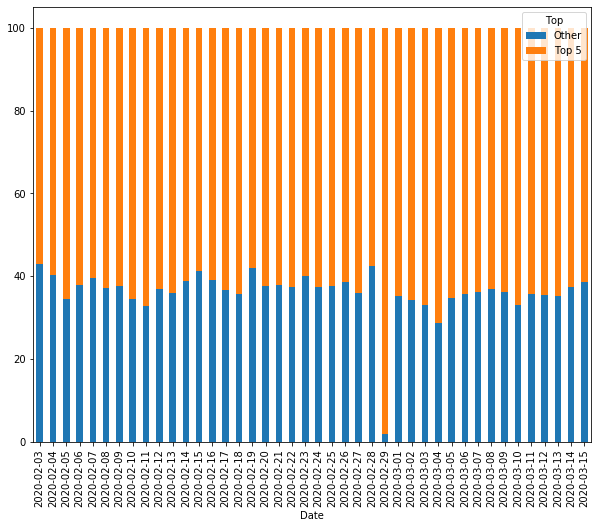

In [47]:
DATA_new['Top']  = DATA_new['Top'].str.replace('Top 1', 'Top 5').str.replace('Top 2', 'Top 5').str.replace('Top 3', 'Top 5').str.replace('Top 4', 'Top 5')
DATA_new = DATA_new.groupby(['Date', 'Top']).sum().reset_index()[['Date', 'Top', 'sale_amount']]
DATA_new2 = DATA_new.groupby(['Date']).sum().reset_index()
DATA_new = DATA_new.merge(DATA_new2, left_on='Date', right_on='Date')
DATA_new['Percent'] = (DATA_new['sale_amount_x']/DATA_new['sale_amount_y'])*100
DATA_new = DATA_new.set_index('Date')
DATA_new.set_index('Top',append=True)['Percent'].unstack().plot.bar(stacked=True,figsize=(10,8))